## Show all test images for the person detection demo

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

The files image0 .. image9 come from the Arduino version of person detection demo

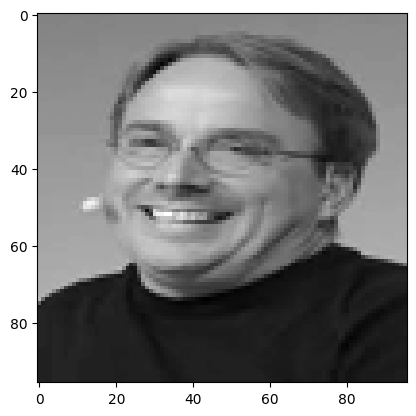

In [2]:
img = Image.open("image0.png").convert("L")
implot = plt.imshow(img, cmap="gray")
plt.show()

In [3]:
def read_img(img_path):
  """Read person / not a person image

  Args:
      img_path (str): path to an image file

  Returns:
      np.array : image in the correct np.array format
  """
  image = Image.open(img_path)
  data = np.asarray(image, dtype=np.float32)
  if data.shape != (96, 96):
    raise ValueError(
        "Invalid input image shape (image should have shape 96*96)"
    )
  # Normalize the image if necessary
  if data.max() > 1:
   data = data / 255.0
  return data

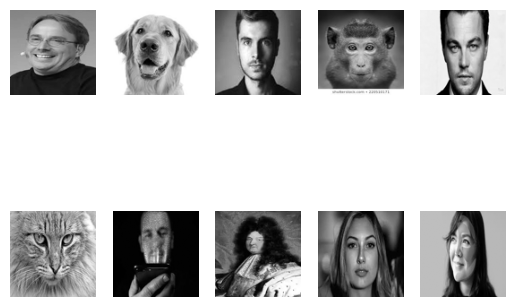

In [4]:
image_array = [None]*10
for img in range(10):
    filename = "image{:d}.png".format(img)
    image_array[img] = read_img(filename)

fig, axs = plt.subplots(2,5)
for i in range(2):
    for j in range(5):
        axs[i,j].axis('off')
        axs[i,j].imshow(image_array[5*i+j],cmap="gray")

Now let's try to read the images from the binary pixel files and display them

In [5]:
pixelFile = open("image0.dat","rb")
data = bytearray(96*96)
pixelFile.readinto(data)
pixelFile.close()

In [6]:
print(type(data),len(data))

<class 'bytearray'> 9216


In [7]:
pixel_array = np.frombuffer(data, dtype=np.uint8)
if pixel_array.max() > 1:
    pixel_array = pixel_array / 255.0
pixel_array = pixel_array.reshape(96,96)
print(len(pixel_array))
print(pixel_array.shape)

96
(96, 96)


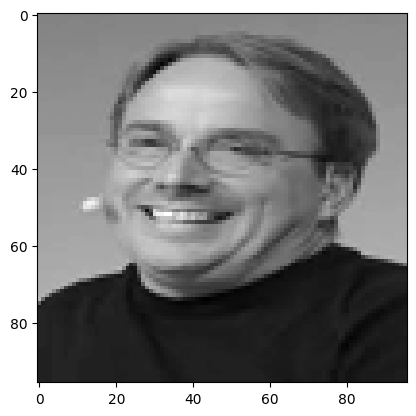

In [8]:
plt.imshow(pixel_array,cmap="gray")

In [9]:
def readPixelFile(pixelPath):
    pixelFile = open(pixelPath,"rb")
    data = bytearray(96*96)
    pixelFile.readinto(data)
    pixel_data = np.frombuffer(data, dtype=np.uint8)
    # Normalize the image if necessary
    if pixel_data.max() > 1:
       pixel_data = pixel_data / 255.0
    pixelFile.close()
    pixel_data = pixel_data.reshape(96,96)
    return pixel_data

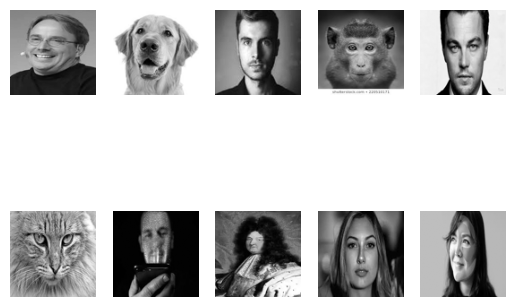

In [10]:
image_array = [None]*10
for img in range(10):
    filename = "image{:d}.dat".format(img)
    image_array[img] = readPixelFile(filename)

fig, axs = plt.subplots(2,5)
for i in range(2):
    for j in range(5):
        axs[i,j].axis('off')
        axs[i,j].imshow(image_array[5*i+j],cmap="gray")

Finally show also the other files  
First the pixel data captured by the esp32s3-fn8 camera named capture.dat

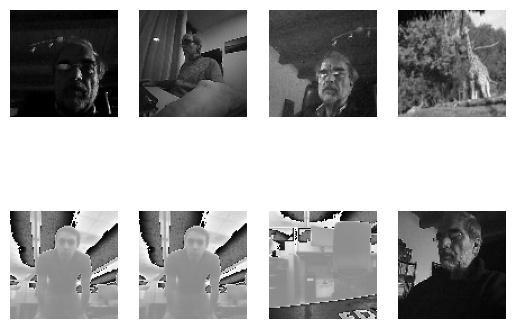

In [11]:
image_array = [None]*10
image_array[0] = readPixelFile("camera_img.dat")
image_array[1] = readPixelFile("capture.dat")
image_array[2] = readPixelFile("me.dat")
image_array[3] = readPixelFile("no_person.dat")
image_array[4] = readPixelFile("person.dat")
image_array[5] = readPixelFile("person_image_data.dat")
image_array[6] = readPixelFile("no_person_image_data.dat")
image_array[7] = readPixelFile("uli.dat")

fig, axs = plt.subplots(2,4)
for i in range(2):
    for j in range(4):
        axs[i,j].axis('off')
        axs[i,j].imshow(image_array[4*i+j],cmap="gray")